In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
import pandas as pd
import numpy as np

In [50]:
header = ['userId', 'movieId', 'rating', 'timestamp' ]
ratings = pd.read_csv('./ml-100k/u.data', sep='\t', names=header)

u_unique = ratings.userId.unique()
user2Idx = {o:i+1 for i,o in enumerate(u_unique)}

m_unique = ratings.movieId.unique()
movie2Idx = {o:i+1 for i,o in enumerate(m_unique)}
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [51]:
idx2Movie = {v:k for k,v in movie2Idx.items()}

In [52]:
header = ['movieId', 'movieTitle', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
items = pd.read_csv('./ml-100k/u.item', sep='|', encoding = "ISO-8859-1", names=header)
items.head()

,movieId,movieTitle,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
def join_df(left, right, left_on, right_on=None):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", "_y"))

ratings = join_df(ratings, items, "movieId", "movieId")

In [54]:
ratings.head()

,userId,movieId,rating,timestamp,movieTitle,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
ratings.userId = ratings.userId.apply(lambda x: user2Idx[x])
ratings.movieId = ratings.movieId.apply(lambda x: movie2Idx[x])

In [56]:
ratings['timestamp'] = ratings['timestamp']/max(ratings['timestamp'])

In [58]:
from sklearn.model_selection import train_test_split
ratings_train, ratings_val = train_test_split(ratings, test_size=0.2)
ratings_train

,userId,movieId,rating,timestamp,movieTitle,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
84459,759,658,3,0.983912,Gandhi (1982),01-Jan-1982,NaN,http://us.imdb.com/M/title-exact?Gandhi%20(1982),0,0,...,0,0,0,0,0,0,0,0,0,0
46766,644,507,4,0.998620,Unforgiven (1992),01-Jan-1992,NaN,http://us.imdb.com/M/title-exact?Unforgiven%20...,0,0,...,0,0,0,0,0,0,0,0,0,1
75540,865,294,1,0.981895,Ghost (1990),01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Ghost%20(1990),0,0,...,0,0,0,0,0,1,0,1,0,0
42764,499,111,4,0.985655,My Fair Lady (1964),01-Jan-1964,NaN,http://us.imdb.com/M/title-exact?My%20Fair%20L...,0,0,...,0,0,0,1,0,1,0,0,0,0
32266,435,261,5,0.985283,Citizen Kane (1941),01-Jan-1941,NaN,http://us.imdb.com/M/title-exact?Citizen%20Kan...,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99899,870,1061,4,0.981169,"Month by the Lake, A (1995)",01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Month%20by%20...,0,0,...,0,0,0,0,0,0,0,0,0,0
48027,709,419,5,0.984899,Hamlet (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Hamlet%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
78936,922,181,3,0.995522,"Close Shave, A (1995)",28-Apr-1996,NaN,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,...,0,0,0,0,0,0,0,1,0,0
69132,21,154,4,0.979277,Face/Off (1997),27-Jun-1997,NaN,http://us.imdb.com/M/title-exact?Face/Off+(1997),0,1,...,0,0,0,0,0,0,1,1,0,0


In [59]:
n_split = 20000
ratings_train = ratings[n_split:]
ratings_val = ratings[:n_split]
len(ratings_train), len(ratings_val)

(80000, 20000)

In [61]:
n_users = int(ratings.userId.nunique())
n_movies = int(ratings.movieId.nunique())
n_users_train = int(ratings_train.userId.nunique())
n_movies_train = int(ratings_train.movieId.nunique())
print(n_users, n_movies, n_users_train, n_movies_train)

943 1682 943 1650


In [62]:
max_rating = ratings_train['rating'].max()
min_rating = ratings_train['rating'].min()
av_rating = ratings_train['rating'].mean()
max_rating, min_rating, av_rating

(5, 1, 3.52835)

In [63]:
from keras.layers import Input, Embedding, Flatten, Dropout, Concatenate, Dense, Activation, Lambda
from keras import Model
from keras.regularizers import l2
from keras.optimizers import Adam

In [64]:
# Diferencia: las dimensiones de los Latent factors pueden ser distintos
n_latent_factors_user = 5
n_latent_factors_movie = 8

In [65]:
genre = ['Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']

In [66]:
genre_input = Input(shape=[len(genre)],name='genre')
timestamp_input = Input(shape=[1],name='timestamp')

# Embedding de la pelicula
movie_input = Input(shape=[1],name='Item')
movie_embedding = Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding', embeddings_regularizer = l2(0.001))(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)
# movie_vec = Dropout(0.2)(movie_vec)


#Embedding del usuario
user_input = Input(shape=[1],name='User')
user_vec = Flatten(name='FlattenUsers')(Embedding(n_users + 1, n_latent_factors_user,name='User-Embedding', embeddings_regularizer = l2(0.001))(user_input))
# user_vec = Dropout(0.2)(user_vec)


concat = Concatenate(name='Concat')([
    movie_vec, user_vec, timestamp_input, genre_input
])
# concat = Dropout(0.2)(concat)

x = Dense(50,name='FullyConnected-1', activation='relu', kernel_regularizer=l2(0.001))(concat)
#x = Dropout(0.5)(x)
#x = Dense(50,name='FullyConnected-1', activation='relu')(concat)
#x = Dropout(0.5)(x)


## Se pueden sacar las siguientes dos lineas para no forzar a sigmoidea
x = Dense(1, activation='sigmoid',name='Activation')(x)
x = Lambda(lambda z: (max_rating - min_rating) * z + min_rating)(x)
##

model = Model([user_input, movie_input, timestamp_input, genre_input], x)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Item (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 User (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 Movie-Embedding (Embedding  (None, 1, 8)                 13464     ['Item[0][0]']                
 )                                                                                                
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 4720      ['User[0][0]']          

In [67]:
from fnn_helper import PlotLosses
plot_losses = PlotLosses(1, None)

In [69]:
import keras.backend as K 
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [71]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss= 'mean_squared_error', metrics=[root_mean_squared_error])

In [72]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, monitor='val_root_mean_squared_error')

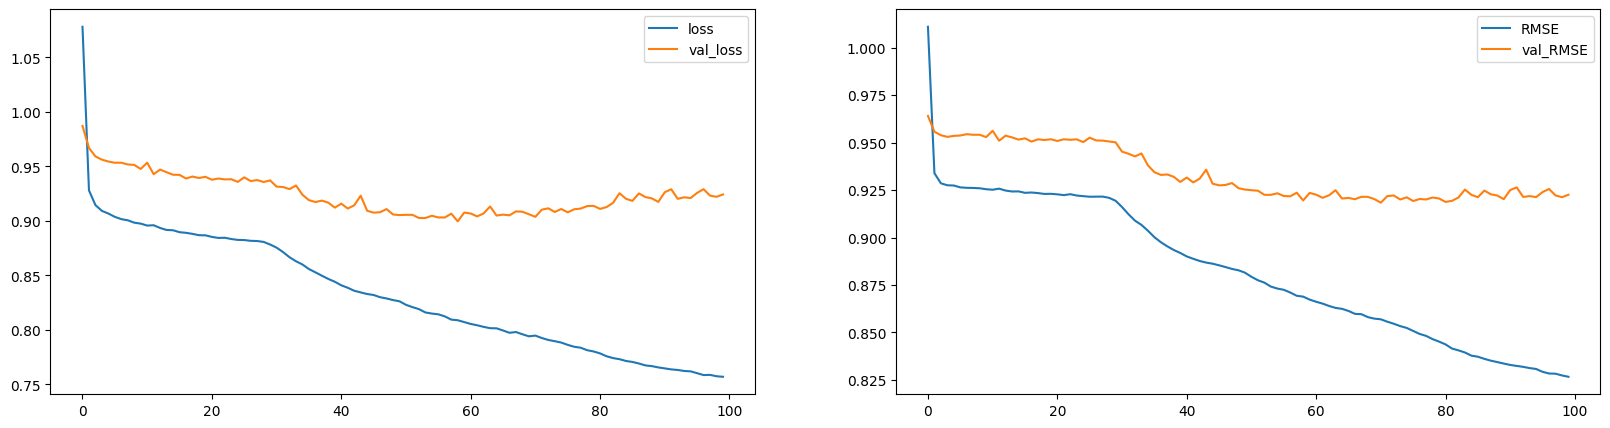


Epoch 100: val_root_mean_squared_error did not improve from 0.91838
500/500 - 1s - loss: 0.7569 - root_mean_squared_error: 0.8267 - val_loss: 0.9242 - val_root_mean_squared_error: 0.9226 - 1s/epoch - 2ms/step


In [73]:
history = model.fit([ratings_train.userId, ratings_train.movieId, ratings_train.timestamp, ratings_train[genre]], 
                    ratings_train.rating, 
                    validation_data=([ratings_val.userId, ratings_val.movieId, ratings_val.timestamp, ratings_val[genre]], ratings_val.rating), 
                    batch_size = 160,
                    callbacks = [plot_losses, checkpointer],
                    epochs=100, verbose=2)

In [74]:
model.evaluate([ratings_val.userId, ratings_val.movieId, ratings_val.timestamp, ratings_val[genre]], ratings_val.rating)

625/625 [==============================] - 1s 1ms/step - loss: 0.9242 - root_mean_squared_error: 0.9151


[0.924156904220581, 0.9151002764701843]

In [75]:
model.load_weights('weights.hdf5')
model.evaluate([ratings_val.userId, ratings_val.movieId, ratings_val.timestamp, ratings_val[genre]], ratings_val.rating)

625/625 [==============================] - 1s 1ms/step - loss: 0.9037 - root_mean_squared_error: 0.9113


[0.903670608997345, 0.9113301634788513]

# Embeddings

In [76]:
movie_embeddings_layer = model.layers[2]
user_embeddings_layer = model.layers[3]



In [77]:
movie_embeddings_layer.name, user_embeddings_layer.name

('Movie-Embedding', 'User-Embedding')

In [84]:
movie_embeddings_matrix = movie_embeddings_layer.get_weights()[0]
user_embeddings_matrix = user_embeddings_layer.get_weights()[0]

print(type(movie_embeddings_matrix[0]))
#type(user_embeddings_matrix)
movie_embeddings_matrix.shape, user_embeddings_matrix.shape

<class 'numpy.ndarray'>


((1683, 8), (944, 5))

In [87]:
model_test_emb = Model([movie_input], [movie_embedding])
print(movie_embedding)

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 8), dtype=tf.float32, name=None), name='Movie-Embedding/embedding_lookup/Identity:0', description="created by layer 'Movie-Embedding'")


In [48]:
index = 424 #6
movie_embed = model_test_emb.predict([index])
items.loc[idx2Movie[index]].movieTitle

1/1 [==============================] - 0s 31ms/step


'Lion King, The (1994)'

In [39]:
from sklearn.neighbors import NearestNeighbors

In [40]:
nbrs = NearestNeighbors(n_neighbors=10, metric='cosine').fit(movie_embeddings_matrix)

In [44]:
neighbors = nbrs.kneighbors([movie_embeddings_matrix[index]])

NameError: name 'index' is not defined

In [43]:
neighbors

NameError: name 'neighbors' is not defined

In [55]:
for idx in neighbors[1][0]:
    print(items.loc[idx2Movie[idx]].movieTitle)

Lion King, The (1994)
Jungle2Jungle (1997)
Specialist, The (1994)
Vanya on 42nd Street (1994)
Cat on a Hot Tin Roof (1958)
Trainspotting (1996)
Bewegte Mann, Der (1994)
Picnic (1955)
Chinatown (1974)
Canadian Bacon (1994)
